In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

import matplotlib.pyplot as plt

# Load data

In [2]:
train = pd.read_csv("6WL_DRS_Noise_Train_70.csv") 
test = pd.read_csv("6WL_DRS_Noise_Test_30.csv")

# Separate into x = wavelength data, y = parameter
# TRAIN
train_wavelengths = train[["w1", "w2", "w3", "w4", "w5", "w6"]].to_numpy()
BVF_train = train["BVF"].to_numpy()
musp_train = train["musp"].to_numpy()
B_train = train["B"].to_numpy()
Mel_train = train["Mel"].to_numpy()
O2_train = train["O2"].to_numpy()
#print(type(train_wavelengths))

# TEST
test_wavelengths = test[["w1", "w2", "w3", "w4", "w5", "w6"]].to_numpy()
BVF_test = test["BVF"].to_numpy()
musp_test = test["musp"].to_numpy()
B_test = test["B"].to_numpy()
Mel_test = test["Mel"].to_numpy()
O2_test = test["O2"].to_numpy()

In [3]:
def MAPE(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def MAE(actual,pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs(actual - pred)) 

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
### BVF ###
# fit model
X = train_wavelengths # same training wavelengths for all models
BVFregr = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=2, random_state=0)
BVFregr.fit(X, BVF_train)

# run
BVF_pred = BVFregr.predict(test_wavelengths)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 2.757457998833921
Mean absolute error: 0.09186466929289644


In [44]:
### musp ###
# fit model
X = train_wavelengths # same training wavelengths for all models
musp_regr = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=2, random_state=0)
musp_regr.fit(X, musp_train)

# run
musp_pred = musp_regr.predict(test_wavelengths)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 4.979418443956456
Mean absolute error: 0.9700022590161562


In [45]:
### B ###
# fit model
X = train_wavelengths # same training wavelengths for all models
Bregr = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=2, random_state=0)
Bregr.fit(X, B_train)

# run
B_pred = Bregr.predict(test_wavelengths)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 8.752968152111835
Mean absolute error: 0.15839366233411212


In [46]:
### Mel ###
# fit model
X = train_wavelengths # same training wavelengths for all models
Melregr = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=2, random_state=0)
Melregr.fit(X, Mel_train)

# run
Mel_pred = Melregr.predict(test_wavelengths)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 4.829866042875651
Mean absolute error: 0.04367749635524767


In [28]:
### O2 ###
# fit model
X = train_wavelengths # same training wavelengths for all models
O2regr = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_split=2, random_state=0)
O2regr.fit(X, O2_train)

# run
O2_pred = O2regr.predict(test_wavelengths)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 8.36843465741302
Mean absolute error: 6.396273586803754


In [ ]:
# Store RF variables
RF_MAPE_BVF = MAPE_BVF
RF_MAE_BVF = MAE_BVF
RF_MAPE_musp = MAPE_musp
RF_MAE_musp = MAE_musp
RF_MAPE_B = MAPE_B
RF_MAE_B = MAE_B
RF_MAPE_Mel = MAPE_Mel
RF_MAE_Mel = MAE_Mel
RF_MAPE_O2 = MAPE_O2
RF_MAE_O2 = MAE_O2

# Gradient Boosting Machine (GBM)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
### BVF ###
# fit model
X = train_wavelengths # same training wavelengths for all models
BVFregr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, max_depth=3, random_state=0)
BVFregr.fit(X, BVF_train)

# rum
BVF_pred = BVFregr.predict(test_wavelengths)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 8.798187655849686
Mean absolute error: 0.23073591124567153


In [47]:
### musp ###
# fit model
X = train_wavelengths # same training wavelengths for all models
musp_regr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, max_depth=3, random_state=0)
musp_regr.fit(X, musp_train)

# rum
musp_pred = musp_regr.predict(test_wavelengths)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 13.747719273293956
Mean absolute error: 2.5403007233657524


In [48]:
### B ###
# fit model
X = train_wavelengths # same training wavelengths for all models
Bregr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, max_depth=3, random_state=0)
Bregr.fit(X, B_train)

# run
B_pred = Bregr.predict(test_wavelengths)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 13.937186151233094
Mean absolute error: 0.2503895011999261


In [49]:
### Mel ###
# fit model
X = train_wavelengths # same training wavelengths for all models
Melregr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, max_depth=3, random_state=0)
Melregr.fit(X, Mel_train)

# run
Mel_pred = Melregr.predict(test_wavelengths)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 14.360070007917905
Mean absolute error: 0.11852515346540773


In [50]:
### O2 ###
# fit model
X = train_wavelengths # same training wavelengths for all models
O2regr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, max_depth=3, random_state=0)
O2regr.fit(X, O2_train)

# run
O2_pred = O2regr.predict(test_wavelengths)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 12.978375810684087
Mean absolute error: 9.967800064512389


In [ ]:
# Store GBM variables
GBM_MAPE_BVF = MAPE_BVF
GBM_MAE_BVF = MAE_BVF
GBM_MAPE_musp = MAPE_musp
GBM_MAE_musp = MAE_musp
GBM_MAPE_B = MAPE_B
GBM_MAE_B = MAE_B
GBM_MAPE_Mel = MAPE_Mel
GBM_MAE_Mel = MAE_Mel
GBM_MAPE_O2 = MAPE_O2
GBM_MAE_O2 = MAE_O2

# Generalized Linear Model (GLM)

In [37]:
from sklearn.linear_model import TweedieRegressor

In [38]:
X = train_wavelengths
BVFregr = TweedieRegressor(power=0, alpha=0.5, link='log')
BVFregr.fit(X, BVF_train)

# run
BVF_pred = BVFregr.predict(test_wavelengths)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 25.36024815584326
Mean absolute error: 0.5347176359116139


In [44]:
X = train_wavelengths
musp_regr = TweedieRegressor(power=0, alpha=0.1, link='log')
musp_regr.fit(X, musp_train)

# run
musp_pred = musp_regr.predict(test_wavelengths)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 18.098119578169445
Mean absolute error: 3.2384660569497945


In [41]:
X = train_wavelengths
Bregr = TweedieRegressor(power=0, alpha=0.5, link='log')
Bregr.fit(X, B_train)

# run
B_pred = Bregr.predict(test_wavelengths)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 18.330494697454995
Mean absolute error: 0.3274324350279938


In [42]:
X = train_wavelengths
Melregr = TweedieRegressor(power=0, alpha=0.5, link='log')
Melregr.fit(X, Mel_train)

# run
Mel_pred = Melregr.predict(test_wavelengths)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 39.724668373783096
Mean absolute error: 0.28131408782076744


In [43]:
X = train_wavelengths
O2regr = TweedieRegressor(power=0, alpha=0.5, link='log')
O2regr.fit(X, O2_train)

# run
O2_pred = O2regr.predict(test_wavelengths)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 9.636429823557325
Mean absolute error: 7.443410614965039


In [ ]:
# Store GLM variables
GLM_MAPE_BVF = MAPE_BVF
GLM_MAE_BVF = MAE_BVF
GLM_MAPE_musp = MAPE_musp
GLM_MAE_musp = MAE_musp
GLM_MAPE_B = MAPE_B
GLM_MAE_B = MAE_B
GLM_MAPE_Mel = MAPE_Mel
GLM_MAE_Mel = MAE_Mel
GLM_MAPE_O2 = MAPE_O2
GLM_MAE_O2 = MAE_O2

## Deep Learning (Neural Network)

In [4]:
# construct a 2 layer network
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [6, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        torch.nn.ReLU()       # activation function
        
        x = self.linear2(x) # hidden layer
        torch.nn.ReLU()       # activation function
        
        x = self.linear3(x) # output layer
        
        return x

In [4]:
def test_batch(model, x, y):
    # run forward calculation
    y_predict = model.forward(x)

    return y, y_predict

#####
def test(model, test_loader):
    y_vectors = list()
    y_predict_vectors = list()

    batch_index = 0
    for x, y in test_loader:
        y, y_predict = test_batch(model=model, x=x, y=y)

        y_vectors.append(y.data.numpy())
        y_predict_vectors.append(y_predict.data.numpy())

        batch_index += 1

    y_predict_vector = np.concatenate(y_predict_vectors)

    return y_predict_vector 
##### Train on a specific batch of data.
def train_batch(model, x, y, optimizer, loss_fn):
    # Run forward calculation
    y_predict = model.forward(x)

    # Compute loss.
    y_predict = y_predict.squeeze(1)
    loss = loss_fn(y_predict, y)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

    return loss.data.item()

##### Iterate over epochs and all batches of data
def train(model, train_loader , test_loader , optimizer, loss_fn, epochs=5):
    losses = list()
    losses_test = list()
    

    batch_index = 0
    for e in range(epochs):
        for x, y in train_loader:
            loss = train_batch(model=model, x=x, y=y, optimizer=optimizer, loss_fn=loss_fn)
            losses.append(loss)

            batch_index += 1
            
        for x , y in test_loader:
            y_predict = model.forward(x)
            losst = loss_fn(y_predict, y)
            
            losses_test.append(losst.data.item())

#         print("Epoch: ", e+1)
#         print("Batches: ", batch_index)

    return losses , losses_test

def plot_loss(losses_train,loss_test, show=True):
    fig = plt.gcf()
    fig.set_size_inches(8,6)
    ax = plt.axes()
    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    x_loss = list(range(len(losses)))
    plt.plot(x_loss, losses_train)
    

    a = list(range(len(loss_test)))
    const = round(len(losses) / len(loss_test))
    b = [(i+1)*const for i in a]
    
    plt.plot(b,loss_test)

    if show:
        plt.show()

    plt.close()
    
def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = 1e-3
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    optimizer = optim.Adam(model.parameters(), lr=learning_rate , weight_decay = weight_decay)

    # Define the loss function
    loss_fn = nn.MSELoss()  # mean squared error

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

In [5]:
class dataset(Dataset):
    def __init__(self, x, y):
        x_dtype = torch.FloatTensor
        y_dtype = torch.FloatTensor     # Use float for continuous data

        self.length = x.shape[0]

        # 1) Extract data from numpy, 2) put it in a tensor, 3) properly data type it.
        self.x_data = torch.from_numpy(x).type(x_dtype)
        self.y_data = torch.from_numpy(y).type(y_dtype)

    # Method for getting an element.
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # Method for getting the length of the dataset
    def __len__(self):
        return self.length

In [7]:
### BVF ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = BVF_train)
dataset_test = dataset(x = test_wavelengths, y = BVF_test)

# print("Train set size: ", dataset_train.length)
# print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

In [8]:
# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
BVF_pred = y_predict
BVF_pred = np.reshape(BVF_pred, 30000)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([30000])) that is different to the input size (torch.Size([30000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Mean absolute percent error: 24.998028032306667
Mean absolute error: 0.547850780984852


In [9]:
### musp ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = musp_train)
dataset_test = dataset(x = test_wavelengths, y = musp_test)


# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch


In [10]:
# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
musp_pred = y_predict
musp_pred = np.reshape(musp_pred, 30000)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 19.20854464503055
Mean absolute error: 3.341511692750001


In [11]:
### B ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = B_train)
dataset_test = dataset(x = test_wavelengths, y = B_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch


In [12]:
# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
B_pred = y_predict
B_pred = np.reshape(B_pred, 30000)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 16.88493507743787
Mean absolute error: 0.295159564957606


In [13]:
### Mel ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = Mel_train)
dataset_test = dataset(x = test_wavelengths, y = Mel_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch


In [14]:
# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
Mel_pred = y_predict
Mel_pred = np.reshape(Mel_pred, 30000)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 29.692027421861006
Mean absolute error: 0.24098214403008736


In [15]:
### O2 ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = O2_train)
dataset_test = dataset(x = test_wavelengths, y = O2_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch


In [16]:
# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
O2_pred = y_predict
O2_pred = np.reshape(O2_pred, 30000)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 9.385084688705486
Mean absolute error: 7.262178227614339


In [17]:
# Store DL variables
DL_MAPE_BVF = MAPE_BVF
DL_MAE_BVF = MAE_BVF
DL_MAPE_musp = MAPE_musp
DL_MAE_musp = MAE_musp
DL_MAPE_B = MAPE_B
DL_MAE_B = MAE_B
DL_MAPE_Mel = MAPE_Mel
DL_MAE_Mel = MAE_Mel
DL_MAPE_O2 = MAPE_O2
DL_MAE_O2 = MAE_O2

# Plot figure

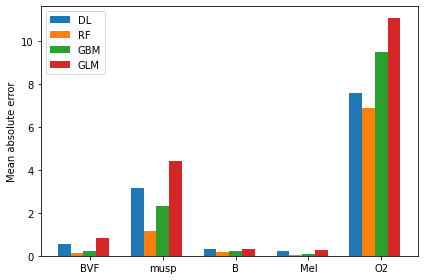

In [91]:
labels = ['BVF', 'musp', 'B', 'Mel', 'O2']
DL = [DL_MAE_BVF,DL_MAE_musp,DL_MAE_B,DL_MAE_Mel,DL_MAE_O2]
RF = [RF_MAE_BVF,RF_MAE_musp,RF_MAE_B,RF_MAE_Mel,RF_MAE_O2]
GBM = [GBM_MAE_BVF,GBM_MAE_musp,GBM_MAE_B,GBM_MAE_Mel,GBM_MAE_O2]
GLM = [GLM_MAE_BVF,GLM_MAE_musp,GLM_MAE_B,GLM_MAE_Mel,GLM_MAE_O2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, DL, width/2, label='DL')
rects2 = ax.bar(x - width/2, RF, width/2, label='RF')
rects3 = ax.bar(x , GBM, width/2, label='GBM')
rects4 = ax.bar(x + width/2, GLM, width/2, label='GLM')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean absolute error')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

# Optimize Neural Network

Things to try: different activation function, different optimizer, width, 3 layer

### Activation: tanh

In [18]:
# construct a 2 layer network
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [6, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function

        x = self.linear3(x) # output layer
        
        return x

In [19]:
### BVF ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = BVF_train)
dataset_test = dataset(x = test_wavelengths, y = BVF_test)

# print("Train set size: ", dataset_train.length)
# print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
BVF_pred = y_predict
BVF_pred = np.reshape(BVF_pred, 30000)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 3.7061432031496166
Mean absolute error: 0.1064343034960747


In [20]:
### musp ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = musp_train)
dataset_test = dataset(x = test_wavelengths, y = musp_test)


# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
musp_pred = y_predict
musp_pred = np.reshape(musp_pred, 30000)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 5.9607987631024875
Mean absolute error: 1.1034572453063967


In [21]:
### B ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = B_train)
dataset_test = dataset(x = test_wavelengths, y = B_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
B_pred = y_predict
B_pred = np.reshape(B_pred, 30000)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 7.521700352357059
Mean absolute error: 0.14351435375454583


In [22]:
### Mel ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = Mel_train)
dataset_test = dataset(x = test_wavelengths, y = Mel_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
Mel_pred = y_predict
Mel_pred = np.reshape(Mel_pred, 30000)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 9.987058828211394
Mean absolute error: 0.06780838378845151


In [23]:
### O2 ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = O2_train)
dataset_test = dataset(x = test_wavelengths, y = O2_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
O2_pred = y_predict
O2_pred = np.reshape(O2_pred, 30000)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 4.574806171346558
Mean absolute error: 3.3887366154917404


In [24]:
# Store DL variables
activation_MAPE_BVF = MAPE_BVF
activation_MAE_BVF = MAE_BVF
activation_MAPE_musp = MAPE_musp
activation_MAE_musp = MAE_musp
activation_MAPE_B = MAPE_B
activation_MAE_B = MAE_B
activation_MAPE_Mel = MAPE_Mel
activation_MAE_Mel = MAE_Mel
activation_MAPE_O2 = MAPE_O2
activation_MAE_O2 = MAE_O2

### Optimizer = SGD

In [25]:

# construct a 2 layer network
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [6, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear3(x) # output layer
        
        return x

In [26]:
def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = 1e-3
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    optimizer = optim.SGD(model.parameters(), lr=learning_rate , weight_decay = weight_decay)

    # Define the loss function
    loss_fn = nn.MSELoss()  # mean squared error

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

In [27]:
### BVF ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = BVF_train)
dataset_test = dataset(x = test_wavelengths, y = BVF_test)

# print("Train set size: ", dataset_train.length)
# print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
BVF_pred = y_predict
BVF_pred = np.reshape(BVF_pred, 30000)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 9.21504712332964
Mean absolute error: 0.2402497406654946


In [28]:
### musp ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = musp_train)
dataset_test = dataset(x = test_wavelengths, y = musp_test)


# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
musp_pred = y_predict
musp_pred = np.reshape(musp_pred, 30000)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 12.40938278010279
Mean absolute error: 2.582665931578318


In [29]:
### B ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = B_train)
dataset_test = dataset(x = test_wavelengths, y = B_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
B_pred = y_predict
B_pred = np.reshape(B_pred, 30000)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 16.09740246135767
Mean absolute error: 0.2919928414457639


In [30]:
### Mel ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = Mel_train)
dataset_test = dataset(x = test_wavelengths, y = Mel_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
Mel_pred = y_predict
Mel_pred = np.reshape(Mel_pred, 30000)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 16.770000516834457
Mean absolute error: 0.14071694263129114


In [31]:
### O2 ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = O2_train)
dataset_test = dataset(x = test_wavelengths, y = O2_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
O2_pred = y_predict
O2_pred = np.reshape(O2_pred, 30000)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 6.212571207518987
Mean absolute error: 4.786939254547119


In [32]:
# Store DL variables
optim_MAPE_BVF = MAPE_BVF
optim_MAE_BVF = MAE_BVF
optim_MAPE_musp = MAPE_musp
optim_MAE_musp = MAE_musp
optim_MAPE_B = MAPE_B
optim_MAE_B = MAE_B
optim_MAPE_Mel = MAPE_Mel
optim_MAE_Mel = MAE_Mel
optim_MAPE_O2 = MAPE_O2
optim_MAE_O2 = MAE_O2

### Loss function = L1 loss

In [33]:
def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = 1e-3
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    optimizer = optim.Adam(model.parameters(), lr=learning_rate , weight_decay = weight_decay)

    # Define the loss function
    loss_fn = nn.L1Loss()  # mean squared error

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

In [34]:
# construct a 2 layer network
class Linear_2Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_2Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, D_out = [6, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear3(x) # output layer
        
        return x

In [35]:
### BVF ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = BVF_train)
dataset_test = dataset(x = test_wavelengths, y = BVF_test)

# print("Train set size: ", dataset_train.length)
# print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
BVF_pred = y_predict
BVF_pred = np.reshape(BVF_pred, 30000)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

c:\users\mayna\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\loss.py:94: UserWarning: Using a target size (torch.Size([30000])) that is different to the input size (torch.Size([30000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Mean absolute percent error: 5.010424494943713
Mean absolute error: 0.1385726077918402


In [36]:
### musp ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = musp_train)
dataset_test = dataset(x = test_wavelengths, y = musp_test)


# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
musp_pred = y_predict
musp_pred = np.reshape(musp_pred, 30000)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 5.324981684329296
Mean absolute error: 1.0118080839557648


In [37]:
### B ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = B_train)
dataset_test = dataset(x = test_wavelengths, y = B_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
B_pred = y_predict
B_pred = np.reshape(B_pred, 30000)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 7.102751896551923
Mean absolute error: 0.13124454184384662


In [38]:
### Mel ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = Mel_train)
dataset_test = dataset(x = test_wavelengths, y = Mel_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
Mel_pred = y_predict
Mel_pred = np.reshape(Mel_pred, 30000)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 8.127907520215155
Mean absolute error: 0.07007454558843665


In [39]:
### O2 ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = O2_train)
dataset_test = dataset(x = test_wavelengths, y = O2_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_2Hidden, width = 200 , weight_decay = 0)
O2_pred = y_predict
O2_pred = np.reshape(O2_pred, 30000)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 3.76161292650809
Mean absolute error: 2.8805162584045414


In [40]:
# Store DL variables
loss_MAPE_BVF = MAPE_BVF
loss_MAE_BVF = MAE_BVF
loss_MAPE_musp = MAPE_musp
loss_MAE_musp = MAE_musp
loss_MAPE_B = MAPE_B
loss_MAE_B = MAE_B
loss_MAPE_Mel = MAPE_Mel
loss_MAE_Mel = MAE_Mel
loss_MAPE_O2 = MAPE_O2
loss_MAE_O2 = MAE_O2

### 3 layer

In [41]:

# construct a 3 layer network
class Linear_3Hidden(nn.Module):
    '''
    A simple, general purpose, fully connected network
    '''
    def __init__(self,width):
        # Perform initialization of the pytorch superclass
        super(Linear_3Hidden, self).__init__()
        
        # Define network layer dimensions
        D_in, H1, H2, H3, D_out = [6, width, width, width, 1]    # These numbers correspond to each layer: [input, hidden_1, output]
        
        # Define layer types
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H2, D_out)

    def forward(self, x):
        '''
        This method defines the network layering and activation functions
        '''
        x = self.linear1(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear2(x) # hidden layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear3(x) # output layer
        x = torch.tanh(x)       # activation function
        
        x = self.linear4(x) # output layer
        
        return x

In [42]:
def run(data_loader_train, data_loader_test , model_to_test , width , weight_decay):
    
    
    # Define the hyperparameters
    learning_rate = 1e-3
    model = model_to_test(width=width)
    
    # Initialize the optimizer with above parameters
    optimizer = optim.Adam(model.parameters(), lr=learning_rate , weight_decay = weight_decay)

    # Define the loss function
    loss_fn = nn.MSELoss()  # mean squared error

    # Train and get the resulting loss per iteration
    loss , loss_test = train(model=model, train_loader=data_loader_train , test_loader = data_loader_test, 
                 optimizer=optimizer, loss_fn=loss_fn)
    
    # Test and get the resulting predicted y values
    y_predict = test(model=model, test_loader=data_loader_test)

    return loss , loss_test , y_predict

In [43]:
### BVF ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = BVF_train)
dataset_test = dataset(x = test_wavelengths, y = BVF_test)

# print("Train set size: ", dataset_train.length)
# print("Test set size: ", dataset_test.length)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 200 , weight_decay = 0)
BVF_pred = y_predict
BVF_pred = np.reshape(BVF_pred, 30000)
MAPE_BVF = MAPE(BVF_test, BVF_pred)
MAE_BVF = MAE(BVF_test, BVF_pred)
print("Mean absolute percent error:", MAPE_BVF)
print("Mean absolute error:", MAE_BVF)

Mean absolute percent error: 4.308949763645162
Mean absolute error: 0.11792087941714284


In [44]:
### musp ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = musp_train)
dataset_test = dataset(x = test_wavelengths, y = musp_test)


# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train, batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch



# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 200 , weight_decay = 0)
musp_pred = y_predict
musp_pred = np.reshape(musp_pred, 30000)
MAPE_musp = MAPE(musp_test, musp_pred)
MAE_musp = MAE(musp_test, musp_pred)
print("Mean absolute percent error:", MAPE_musp)
print("Mean absolute error:", MAE_musp)

Mean absolute percent error: 5.081618116188605
Mean absolute error: 0.9366752084828694


In [45]:
### B ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = B_train)
dataset_test = dataset(x = test_wavelengths, y = B_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 200 , weight_decay = 0)
B_pred = y_predict
B_pred = np.reshape(B_pred, 30000)
MAPE_B = MAPE(B_test, B_pred)
MAE_B = MAE(B_test, B_pred)
print("Mean absolute percent error:", MAPE_B)
print("Mean absolute error:", MAE_B)

Mean absolute percent error: 7.55008802879265
Mean absolute error: 0.13993468875493048


In [46]:
### Mel ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = Mel_train)
dataset_test = dataset(x = test_wavelengths, y = Mel_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 200 , weight_decay = 0)
Mel_pred = y_predict
Mel_pred = np.reshape(Mel_pred, 30000)
Mel_pred_new = np.delete(Mel_pred, np.where(Mel_test == 0))
Mel_test_new = np.delete(Mel_test, np.where(Mel_test == 0))
MAPE_Mel = MAPE(Mel_test_new, Mel_pred_new)
MAE_Mel = MAE(Mel_test, Mel_pred)
print("Mean absolute percent error:", MAPE_Mel)
print("Mean absolute error:", MAE_Mel)

Mean absolute percent error: 6.907444885615206
Mean absolute error: 0.057981358202310956


In [47]:
### O2 ###
# Recast the training and test data sets into proper pytorch tensors.

dataset_train = dataset(x = train_wavelengths, y = O2_train)
dataset_test = dataset(x = test_wavelengths, y = O2_test)

# Batch size is the number of training examples used to calculate each iteration's gradient
batch_size_train = 16

# Construct data loader iterables for the training and test data sets.
data_loader_train = DataLoader(dataset=dataset_train,batch_size=batch_size_train, shuffle=True)
data_loader_test = DataLoader(dataset=dataset_test, batch_size=len(dataset_test), shuffle=False) # No need to batch

# run
losses, loss_test, y_predict = run(data_loader_train=data_loader_train, data_loader_test=data_loader_test ,
                        model_to_test = Linear_3Hidden, width = 200 , weight_decay = 0)
O2_pred = y_predict
O2_pred = np.reshape(O2_pred, 30000)
MAPE_O2 = MAPE(O2_test, O2_pred)
MAE_O2 = MAE(O2_test, O2_pred)
print("Mean absolute percent error:", MAPE_O2)
print("Mean absolute error:", MAE_O2)

Mean absolute percent error: 14.631384537566305
Mean absolute error: 11.126042918103025


In [48]:
# Store DL variables
threelayer_MAPE_BVF = MAPE_BVF
threelayer_MAE_BVF = MAE_BVF
threelayer_MAPE_musp = MAPE_musp
threelayer_MAE_musp = MAE_musp
threelayer_MAPE_B = MAPE_B
threelayer_MAE_B = MAE_B
threelayer_MAPE_Mel = MAPE_Mel
threelayer_MAE_Mel = MAE_Mel
threelayer_MAPE_O2 = MAPE_O2
threelayer_MAE_O2 = MAE_O2

# Plot errors

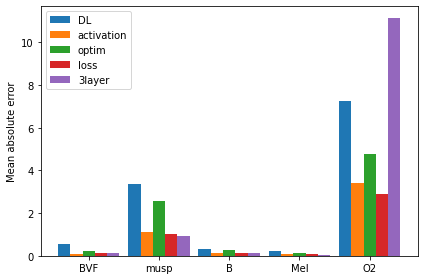

In [51]:
labels = ['BVF', 'musp', 'B', 'Mel', 'O2']
DL = [DL_MAE_BVF,DL_MAE_musp,DL_MAE_B,DL_MAE_Mel,DL_MAE_O2] # original
activation = [activation_MAE_BVF,activation_MAE_musp,activation_MAE_B,activation_MAE_Mel,activation_MAE_O2]
optim = [optim_MAE_BVF,optim_MAE_musp,optim_MAE_B,optim_MAE_Mel,optim_MAE_O2]
lossfn = [loss_MAE_BVF,loss_MAE_musp,loss_MAE_B,loss_MAE_Mel,loss_MAE_O2]
threelayer = [threelayer_MAE_BVF,threelayer_MAE_musp,threelayer_MAE_B,threelayer_MAE_Mel,threelayer_MAE_O2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, DL, width/2, label='DL')
rects2 = ax.bar(x - width/2, activation, width/2, label='activation')
rects3 = ax.bar(x , optim, width/2, label='optim')
rects4 = ax.bar(x + width/2, lossfn, width/2, label='loss')
rects4 = ax.bar(x + width, threelayer, width/2, label='3layer')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean absolute error')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()